In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
from statsmodels.stats.libqsturng import psturng

# Zadanie 
Pewna grupa poddała się trzem testom.
Na podstawie poniższych wyników chcielibyśmy zweryfikować hipotezę zerowa mówiącą, że średni wynik w tych trzech testach jest taki sam.

In [2]:
data = np.rec.array([
    (  1,   'mental',  2 ),
    (  2,   'mental',  2 ),
    (  3,   'mental',  3 ),
    (  4,   'mental',  4 ),
    (  5,   'mental',  4 ),
    (  6,   'mental',  5 ),
    (  7,   'mental',  3 ),
    (  8,   'mental',  4 ),
    (  9,   'mental',  4 ),
    ( 10,   'mental',  4 ),
    ( 11, 'physical',  4 ),
    ( 12, 'physical',  4 ),
    ( 13, 'physical',  3 ),
    ( 14, 'physical',  5 ),
    ( 15, 'physical',  4 ),
    ( 16, 'physical',  1 ),
    ( 17, 'physical',  1 ),
    ( 18, 'physical',  2 ),
    ( 19, 'physical',  3 ),
    ( 20, 'physical',  3 ),
    ( 21,  'medical',  1 ),
    ( 22,  'medical',  2 ),
    ( 23,  'medical',  2 ),
    ( 24,  'medical',  2 ),
    ( 25,  'medical',  3 ),
    ( 26,  'medical',  2 ),
    ( 27,  'medical',  3 ),
    ( 28,  'medical',  1 ),
    ( 29,  'medical',  3 ),
    ( 30,  'medical',  1 )], dtype=[('idx', '<i4'),
                                    ('Treatment', '|S8'),
                                    ('StressReduction', '<i4')])

# Wykonujemy test ANOVA

In [7]:
df = pd.DataFrame(data)
d1=df["StressReduction"][df["Treatment"]==b'mental']
d2=df["StressReduction"][df["Treatment"]==b'physical']
d3=df["StressReduction"][df["Treatment"]==b'medical']

print(d1.head())
print(d2.head())
print(d3.head())

0    2
1    2
2    3
3    4
4    4
Name: StressReduction, dtype: int32
10    4
11    4
12    3
13    5
14    4
Name: StressReduction, dtype: int32
20    1
21    2
22    2
23    2
24    3
Name: StressReduction, dtype: int32


In [8]:
f, p = stats.f_oneway(d1,
                      d2,
                      d3)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')


One-way ANOVA
F value: 5.163934426229508
P value: 0.012617190941750378 



In [10]:
# test Levene
(W,p) = stats.levene(d1, d2, d3)
if p<0.05:
    print('Warning: p-value of test Levene is < 0,05, pvalue =',p)
else:
    print('test przeszedł, pvalue =',p)   # jak to sie ma do wniosku poniżej????

test przeszedł, pvalue = 0.4567120561411028


## Wniosek

Odrzucamy hipotezę H0 o równości średnich.

# Wykonujemy analizę post hoc

In [11]:
multiComp = MultiComparison(data['StressReduction'], data['Treatment'])
print(multiComp)

In [13]:
multiComp.tukeyhsd().summary()

group1,group2,meandiff,lower,upper,reject
b'medical',b'mental',1.5,0.3217,2.6783,True
b'medical',b'physical',1.0,-0.1783,2.1783,False
b'mental',b'physical',-0.5,-1.6783,0.6783,False


In [15]:
# Calculate the p-values:
res2 = pairwise_tukeyhsd(data['StressReduction'], data['Treatment'])
df = pd.DataFrame(data)
numData = len(df)
numTreatments = len(df.Treatment.unique())
dof = numData - numTreatments
# Show the group names
print((multiComp.groupsunique))

[b'medical' b'mental' b'physical']


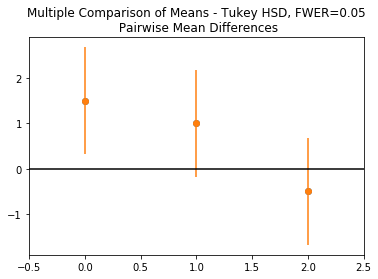

In [19]:
# Get the data
xvals = np.arange(3)
res2 = pairwise_tukeyhsd(data['StressReduction'], data['Treatment'])
errors = np.ravel(np.diff(res2.confint)/2)

# Plot them
plt.plot(xvals, res2.meandiffs, 'o')
plt.errorbar(xvals, res2.meandiffs, yerr=errors, fmt='o')

# # Put on labels
pair_labels = multiComp.groupsunique[np.column_stack(res2._multicomp.pairindices)]
# plt.xticks(xvals, pair_labels) - opisuje pary sposobow leczenia, ale u mnie nie działa :/

# # Format the plot
xlim = -0.5, 2.5
plt.hlines(0, *xlim)
plt.xlim(*xlim)
plt.title('Multiple Comparison of Means - Tukey HSD, FWER=0.05' + '\n Pairwise Mean Differences')          
plt.show()

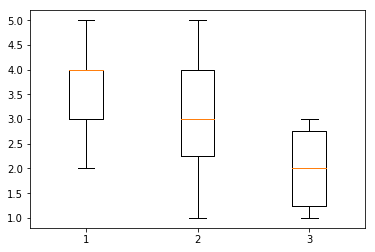

mental =  3.5    physical =  3.0    medical =  2.0


In [24]:
plt.boxplot([d1,d2,d3])
plt.show()
print('mental = ', d1.mean(), '   physical = ', d2.mean(), '   medical = ', d3.mean())

In [25]:
# medical i physical są statystycznie takie same, medical i mental nie są, zatem kolejność 1,2,3

In [ ]:
# jaka odpowiedź?